# Ejemplo de regresión
- Basado en: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score

In [3]:
def funcion_real(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_datos = 30
grados = [1, 4, 15]

In [7]:
X = np.sort(np.random.rand(n_datos)) # Núm. aleatorios entre 0 y 1
y = funcion_real(X) + np.random.randn(n_datos) * 0.1

In [8]:
X

array([0.03918779, 0.0641475 , 0.09394051, 0.09609841, 0.09710128,
       0.11872772, 0.12019656, 0.13179786, 0.19658236, 0.26538949,
       0.28280696, 0.2961402 , 0.31798318, 0.31856895, 0.36872517,
       0.41426299, 0.4686512 , 0.52324805, 0.56660145, 0.5759465 ,
       0.60484552, 0.66741038, 0.69247212, 0.7163272 , 0.73926358,
       0.82099323, 0.83794491, 0.9292962 , 0.97645947, 0.97676109])

Grado:  1  Coeficientes:  [-1.8969996]
::: R2::: 0.584471872750282 

Grado:  4  Coeficientes:  [  2.97351712 -25.29307709  32.82059194 -11.23283144]
::: R2::: 0.9928329251861767 

Grado:  15  Coeficientes:  [ 5.96425562e+02 -2.09191689e+04  4.08265374e+05 -4.98300475e+06
  4.05228903e+07 -2.28588430e+08  9.18621943e+08 -2.67422940e+09
  5.68404549e+09 -8.81029069e+09  9.83933852e+09 -7.70423309e+09
  4.01073417e+09 -1.24607178e+09  1.74745490e+08]
::: R2::: -72.09697202288447 



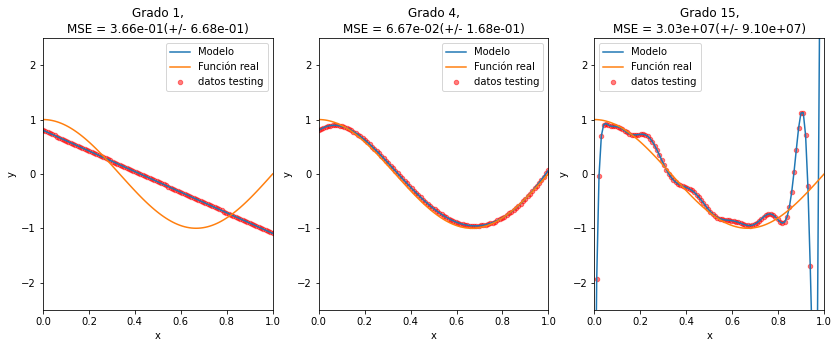

In [11]:
plt.figure(figsize=(14, 5))

for i in range(len(grados)):
    ax = plt.subplot(1, len(grados), i + 1)
    var_poli = PolynomialFeatures(degree=grados[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", var_poli),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print("Grado: ", grados[i], " Coeficientes: ", pipeline.steps[1][1].coef_)
    
    # Evaluar modelo usando cross-validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    
    from sklearn.metrics import r2_score
    X_test = np.linspace(0, 1, 100)
    predictions = pipeline.predict(X_test[:, np.newaxis])
    print("::: R2:::",r2_score(funcion_real(X_test), predictions), "\n")

    
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo")
    plt.plot(X_test, funcion_real(X_test), label="Función real")
    #plt.scatter(X, y, edgecolor='b', s=20, label="datos training", color="b")
    plt.scatter(X_test, pipeline.predict(X_test[:, np.newaxis]), color="r", 
                edgecolor='r', s=20, label="datos testing", alpha=0.5)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2.5, 2.5))
    plt.legend(loc="best")
    plt.title("Grado {},\nMSE = {:.2e}(+/- {:.2e})".format(
        grados[i], -scores.mean(), scores.std()))
plt.show()